In [1]:
pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 6.5MB 13.6MB/s 
     |████████████████████████████████| 14.8MB 321kB/s 


# World

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import geopandas as gpd
import time
import pylab as pl
from IPython import display

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [4]:
data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,NaN,0.0,NaN,18.733,18.733,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,NaN,0.0,0.0,37.465,18.733,2.676,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55888,NaN,NaN,International,2020-11-06,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55889,NaN,NaN,International,2020-11-07,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55890,NaN,NaN,International,2020-11-08,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55891,NaN,NaN,International,2020-11-09,696.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data["location"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Western Sahara', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'Falkland Islands', 'France',

In [6]:
data_noworld = data[data["location"] != "World"]

In [7]:
data_onlycountries = data_noworld[data_noworld["location"] != "International"]

In [8]:
data_onlycountries["location"].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Anguilla', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Bonaire Sint Eustatius and Saba',
       'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt',
       'Eritrea', 'Western Sahara', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'Falkland Islands', 'France',

In [9]:
data_onlycountries = data_onlycountries[["location", "date", "total_cases"]]

In [10]:
data_onlycountries

,location,date,total_cases
0,Aruba,2020-03-13,2.0
1,Aruba,2020-03-19,NaN
2,Aruba,2020-03-20,4.0
3,Aruba,2020-03-21,NaN
4,Aruba,2020-03-22,NaN
...,...,...,...
55256,Zimbabwe,2020-11-06,8444.0
55257,Zimbabwe,2020-11-07,8471.0
55258,Zimbabwe,2020-11-08,8498.0
55259,Zimbabwe,2020-11-09,8531.0


In [11]:
data_countrydate = data_onlycountries.groupby(["date", "location"]).sum().reset_index()

In [12]:
data_countrydate

,date,location,total_cases
0,2019-12-31,Afghanistan,0.0
1,2019-12-31,Algeria,0.0
2,2019-12-31,Armenia,0.0
3,2019-12-31,Australia,0.0
4,2019-12-31,Austria,0.0
...,...,...,...
55256,2020-11-10,Wallis and Futuna,1.0
55257,2020-11-10,Western Sahara,766.0
55258,2020-11-10,Yemen,2070.0
55259,2020-11-10,Zambia,16971.0


In [13]:
fig = px.choropleth(data_countrydate, 
                    locations="location", 
                    locationmode = "country names",
                    color="total_cases", 
                    hover_name="location", 
                    color_continuous_scale="OrRd",
                    animation_frame="date"
                   )

fig.update_layout(
    title_text = "Total cases of coronavirus",
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
fig.show()

# Portugal

In [14]:
confirmed = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [15]:
confirmed.drop(["Province/State", "Lat", "Long"], axis=1, inplace=True)
confirmed.set_index("Country/Region", inplace=True)
dates = list(confirmed.columns)[1:]
confirmedportugal = list(confirmed.loc["Portugal"])[1:]

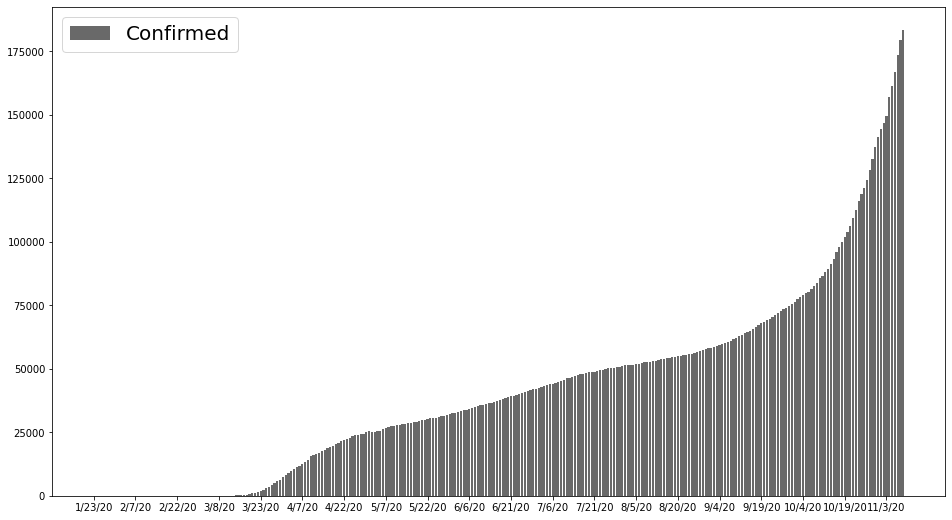

In [16]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(dates, confirmedportugal, color="dimgrey", label="Confirmed")
plt.xticks(list(np.arange(0, len(dates), 15)))
plt.legend(prop={'size': 20}, loc=2)
plt.show()

In [17]:
deaths = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

In [18]:
deaths.drop(["Province/State", "Lat", "Long"], axis=1, inplace=True)
deaths.set_index("Country/Region", inplace=True)
deathsportugal = list(deaths.loc["Portugal"])[1:]

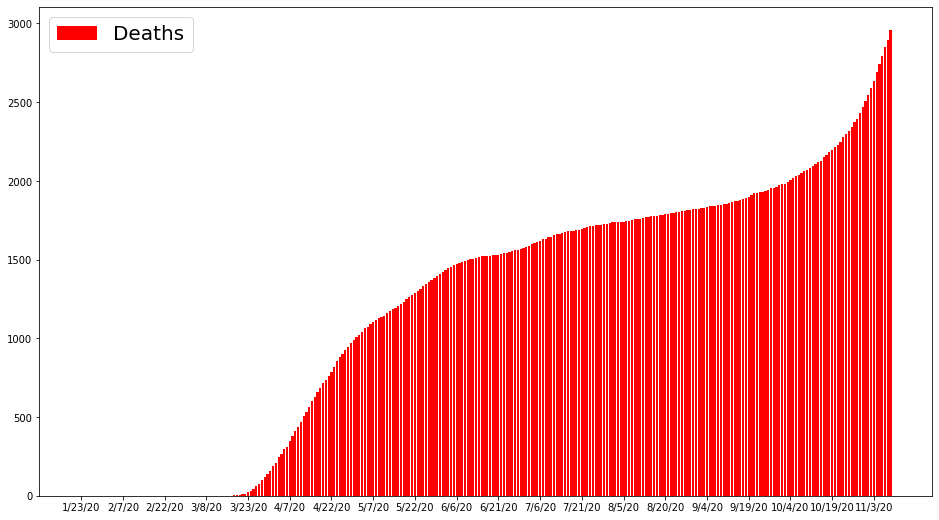

In [19]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(dates, deathsportugal, color="red", label="Deaths")
plt.xticks(list(np.arange(0, len(dates), 15)))
plt.legend(prop={'size': 20}, loc=2)
plt.show()

In [20]:
recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [21]:
recovered.drop(["Province/State", "Lat", "Long"], axis=1, inplace=True)
recovered.set_index("Country/Region", inplace=True)
recoveredportugal = list(recovered.loc["Portugal"])[1:]

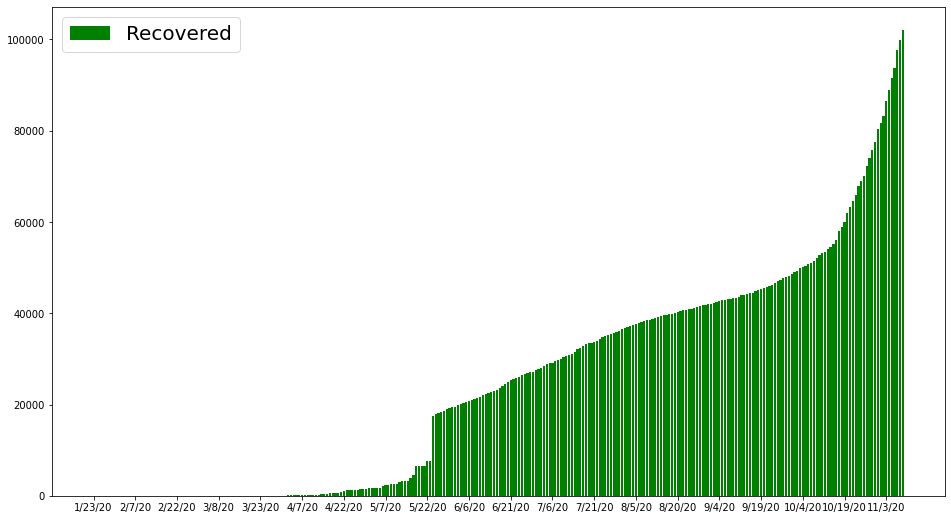

In [22]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(dates, recoveredportugal, color="green", label="Recovered")
plt.xticks(list(np.arange(0, len(dates), 15)))
plt.legend(prop={'size': 20}, loc=2)
plt.show()

In [23]:
active = []
for i in range(len(confirmedportugal)):
    active.append(confirmedportugal[i] - recoveredportugal[i] - deathsportugal[i])

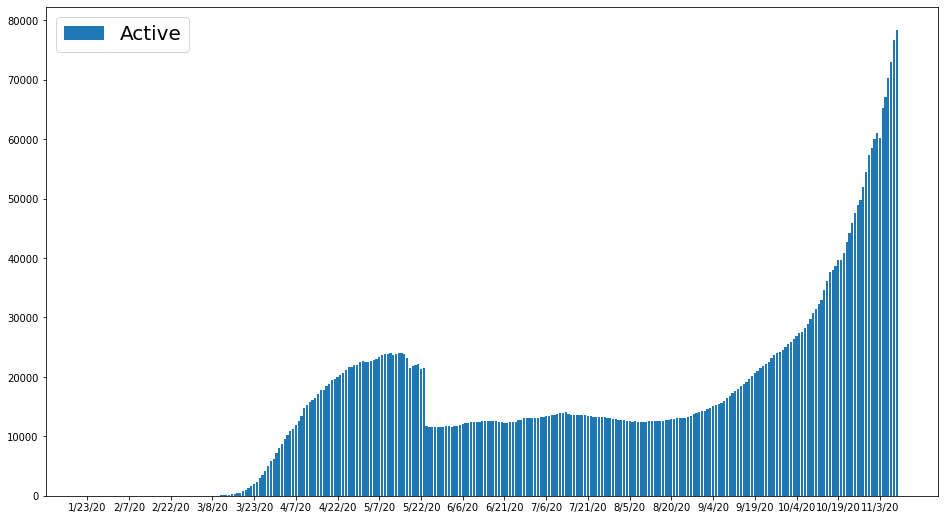

In [24]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(dates, active, label="Active")
plt.xticks(list(np.arange(0, len(dates), 15)))
plt.legend(prop={'size': 20}, loc=2)
plt.show()

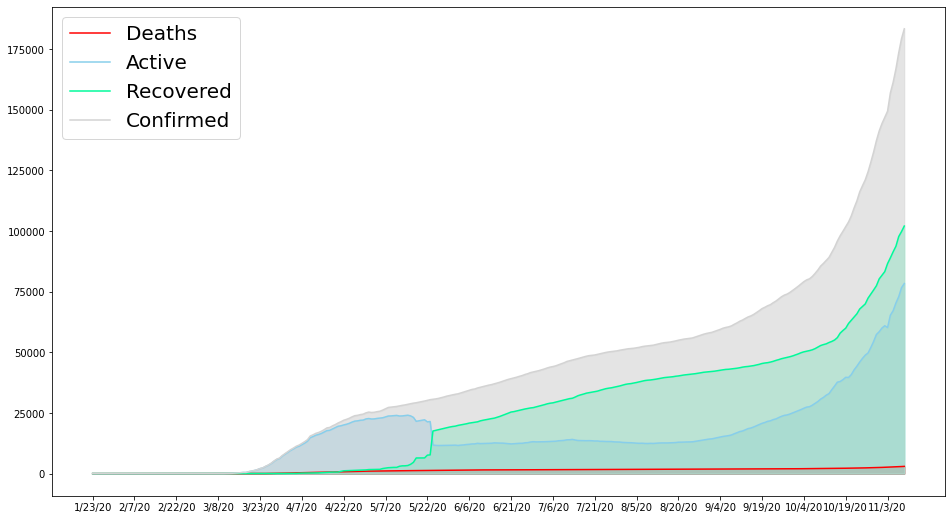

In [25]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(dates, deathsportugal, color="red", label="Deaths")
plt.fill_between(dates, deathsportugal, color="red")
ax.plot(dates, active, color="skyblue", label="Active")
plt.fill_between(dates, active, color="skyblue", alpha=0.6)
ax.plot(dates, recoveredportugal, color="mediumspringgreen", label="Recovered")
plt.fill_between(dates, recoveredportugal, color="mediumspringgreen", alpha=0.4)
ax.plot(dates, confirmedportugal, color="lightgrey", label="Confirmed")
plt.fill_between(dates, confirmedportugal, color="lightgrey", alpha=0.6)
plt.legend(prop={'size': 20})
plt.xticks(list(np.arange(0, len(dates), 15)))
plt.show()

In [26]:
ptdata = gpd.read_file("https://raw.githubusercontent.com/nmota/caop_GeoJSON/master/ContinenteConcelhos.geojson")

In [27]:
ptdata.head()

,DICO,Concelho,Distrito,NUTIII_DSG,NUTII_DSG,NUTI_DSG,ALT_MAX,ALT_MIN,Area_Ha,N_Freguesi,geometry
0,0101,ÁGUEDA,AVEIRO,REGIÃO DE AVEIRO,CENTRO,CONTINENTE,758,4,33527.44,11,"POLYGON ((-20560.758 113803.912, -20550.798 11..."
1,0102,ALBERGARIA-A-VELHA,AVEIRO,REGIÃO DE AVEIRO,CENTRO,CONTINENTE,425,0,15882.50,6,"POLYGON ((-26966.492 123573.381, -26964.759 12..."
2,0103,ANADIA,AVEIRO,REGIÃO DE AVEIRO,CENTRO,CONTINENTE,525,13,21663.48,10,"POLYGON ((-17449.514 93729.645, -17450.254 937..."
3,0104,AROUCA,AVEIRO,ÁREA METROPOLITANA DO PORTO,NORTE,CONTINENTE,1220,50,32910.52,16,"POLYGON ((-7133.618 149431.412, -7096.198 1494..."
4,0105,AVEIRO,AVEIRO,REGIÃO DE AVEIRO,CENTRO,CONTINENTE,78,0,19757.57,10,"POLYGON ((-42619.981 117138.132, -42536.222 11..."


In [28]:
confirmados = pd.read_csv("https://raw.githubusercontent.com/dssg-pt/covid19pt-data/master/data_concelhos.csv")

In [29]:
confirmados

,data,ABRANTES,AGUIAR DA BEIRA,ALANDROAL,ALBERGARIA-A-VELHA,ALBUFEIRA,ALCANENA,ALCOBAÇA,ALCOCHETE,ALCOUTIM,ALCÁCER DO SAL,ALENQUER,ALFÂNDEGA DA FÉ,ALIJÓ,ALJEZUR,ALJUSTREL,ALMADA,ALMEIDA,ALMEIRIM,ALMODÔVAR,ALPIARÇA,ALTER DO CHÃO,ALVAIÁZERE,ALVITO,AMADORA,AMARANTE,AMARES,ANADIA,ANGRA DO HEROÍSMO,ANSIÃO,ARCOS DE VALDEVEZ,ARGANIL,ARMAMAR,AROUCA,ARRAIOLOS,ARRONCHES,ARRUDA DOS VINHOS,AVEIRO,AVIS,AZAMBUJA,...,VALE DE CAMBRA,VALENÇA,VALONGO,VALPAÇOS,VELAS,VENDAS NOVAS,VIANA DO ALENTEJO,VIANA DO CASTELO,VIDIGUEIRA,VIEIRA DO MINHO,VILA DA PRAIA DA VITÓRIA,VILA DE REI,VILA DO BISPO,VILA DO CONDE,VILA DO PORTO,VILA FLOR,VILA FRANCA DE XIRA,VILA FRANCA DO CAMPO,VILA NOVA DA BARQUINHA,VILA NOVA DE CERVEIRA,VILA NOVA DE FAMALICÃO,VILA NOVA DE FOZ CÔA,VILA NOVA DE GAIA,VILA NOVA DE PAIVA,VILA NOVA DE POIARES,VILA POUCA DE AGUIAR,VILA REAL,VILA REAL DE SANTO ANTÓNIO,VILA VELHA DE RÓDÃO,VILA VERDE,VILA VIÇOSA,VIMIOSO,VINHAIS,VISEU,VIZELA,VOUZELA,ÁGUEDA,ÉVORA,ÍLHAVO,ÓBIDOS
0,24-03-2020,NaN,NaN,NaN,5,5,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,...,3,NaN,65,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,5,NaN,NaN,NaN,12,NaN,68,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,3,4,NaN,NaN
1,25-03-2020,NaN,NaN,NaN,5,8,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,3.0,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,...,4,NaN,71,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,6,NaN,NaN,NaN,14,NaN,83,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,3,5,NaN,NaN
2,26-03-2020,NaN,NaN,NaN,21,18,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,NaN,3.0,NaN,NaN,NaN,3.0,NaN,31,NaN,6.0,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,46,NaN,NaN,...,3,NaN,100,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,6,NaN,NaN,NaN,44,NaN,163,NaN,NaN,NaN,8,3.0,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,10,8,10.0,NaN
3,27-03-2020,NaN,NaN,NaN,28,22,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,3.0,3.0,NaN,NaN,NaN,3.0,NaN,31,3.0,7.0,4.0,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN,...,5,NaN,108,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,15,NaN,NaN,6,NaN,NaN,NaN,48,NaN,262,NaN,NaN,NaN,34,5.0,NaN,5.0,NaN,NaN,NaN,21,3.0,NaN,10,8,12.0,NaN
4,28-03-2020,NaN,NaN,NaN,28,22,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53,3.0,7.0,NaN,3.0,NaN,4.0,NaN,41,4.0,8.0,4.0,NaN,NaN,7,NaN,NaN,8.0,NaN,NaN,NaN,62,NaN,NaN,...,15,NaN,139,NaN,5.0,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,22,NaN,NaN,16,NaN,NaN,NaN,48,NaN,262,NaN,NaN,3.0,98,5.0,NaN,10.0,NaN,NaN,NaN,21,4.0,NaN,13,12,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,28-09-2020,55.0,24.0,6.0,102,258,24.0,185.0,71,NaN,51.0,311.0,5.0,8.0,9.0,4.0,1250,9.0,46.0,10.0,18.0,NaN,25.0,NaN,3038,145.0,115.0,71.0,13.0,10.0,88,17.0,11.0,240.0,25.0,NaN,88.0,459,4.0,254.0,...,159,53.0,859,12.0,6.0,14.0,5.0,293,NaN,39.0,8.0,NaN,8.0,895,NaN,8.0,1630,NaN,13.0,19.0,798,49.0,2275,3.0,17.0,28.0,184,79.0,9.0,390.0,5.0,84.0,47.0,247,202.0,21.0,145,159,223.0,21.0
118,05-10-2020,57.0,29.0,6.0,106,292,26.0,199.0,78,11.0,54.0,342.0,6.0,8.0,9.0,6.0,1393,10.0,48.0,10.0,18.0,NaN,25.0,NaN,3149,153.0,122.0,74.0,18.0,10.0,88,17.0,11.0,239.0,27.0,NaN,97.0,470,6.0,271.0,...,163,67.0,908,19.0,6.0,14.0,4.0,309,NaN,41.0,8.0,NaN,13.0,930,NaN,8.0,1713,NaN,15.0,25.0,858,50.0,2421,6.0,17.0,28.0,191,101.0,9.0,417.0,4.0,90.0,52.0,259,213.0,22.0,149,170,229.0,22.0
119,12-10-2020,58.0,30.0,5.0,115,326,28.0,223.0,95,10.0,54.0,380.0,10.0,14.0,9.0,6.0,1485,12.0,48.0,10.0,18.0,3.0,27.0,NaN,3268,179.0,131.0,79.0,20.0,10.0,87,17.0,12.0,252.0,27.0,NaN,112.0,502,10.0,278.0,...,171,83.0,986,27.0,6.0,15.0,4.0,339,3.0,43.0,8.0,NaN,16.0,982,NaN,10.0,1836,NaN,16.0,28.0,915,50.0,2589,9.0,19.0,31.0,235,108.0,9.0,436.0,4.0,92.0,59.0,273,238.0,22.0,154,177,24

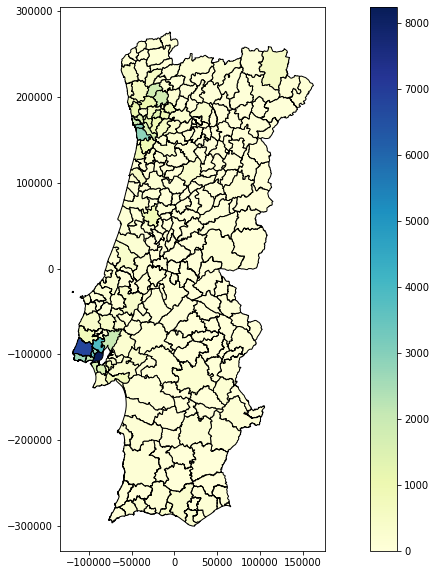

In [30]:
for num in range(len(confirmados)-1):
  confirmadosdia = confirmados.iloc[num]
  confirmadosdia = confirmadosdia[1:]
  confirmadosdia.fillna(0, inplace=True)
  confirmadosdia=pd.DataFrame(confirmadosdia)
  confirmadosdia.reset_index(inplace=True)
  confirmadosdia.rename({"index": "Concelho"}, axis=1, inplace=True)
  confirmadosdia.rename({num: "Casos confirmados"}, axis=1, inplace=True)
  confirmadosgeo = ptdata.merge(confirmadosdia, on="Concelho")
  confirmadosgeo = confirmadosgeo[["Concelho", "geometry", "Casos confirmados"]]
  confirmadosgeo.plot(column = "Casos confirmados",
                         cmap='YlGnBu',
                         figsize=(16,10),
                         legend=True,
                         edgecolor="black")
  display.display(pl.gcf())
  display.clear_output(wait=True)
  plt.close()
  time.sleep(0.1)

References:
* https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv
* https://plotly.com/python/choropleth-maps/
* https://www.kaggle.com/terenceshin/coronavirus-data-visualizations
* https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series
* https://github.com/nmota/caop_GeoJSON/blob/master/ContinenteConcelhos.geojson
* https://github.com/dssg-pt/covid19pt-data/blob/master/data_concelhos.csv
* https://medium.com/@rodrigodutcosky/mapas-coropl%C3%A9ticos-com-os-estados-do-brasil-em-python-b9b48c6db585
* https://stackoverflow.com/questions/21360361/how-to-dynamically-update-a-plot-in-a-loop-in-ipython-notebook-within-one-cell?rq=1
